#Assignment 3

## Import dataset

In [1]:
import pandas as pd
import numpy as np

In [2]:
dataset = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Assignment3/customer_data.csv")

In [3]:
dataset.head()

,label,id,fea_1,fea_2,fea_3,fea_4,fea_5,fea_6,fea_7,fea_8,fea_9,fea_10,fea_11
0,1,54982665,5,1245.5,3,77000.0,2,15,5,109,5,151300,244.948974
1,0,59004779,4,1277.0,1,113000.0,2,8,-1,100,3,341759,207.173840
2,0,58990862,7,1298.0,1,110000.0,2,11,-1,101,5,72001,1.000000
3,1,58995168,7,1335.5,1,151000.0,2,11,5,110,3,60084,1.000000
4,0,54987320,7,NaN,2,59000.0,2,11,5,108,4,450081,197.403141


In [4]:
dataset.isnull().sum()

label       0
id          0
fea_1       0
fea_2     149
fea_3       0
fea_4       0
fea_5       0
fea_6       0
fea_7       0
fea_8       0
fea_9       0
fea_10      0
fea_11      0
dtype: int64

In [5]:
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


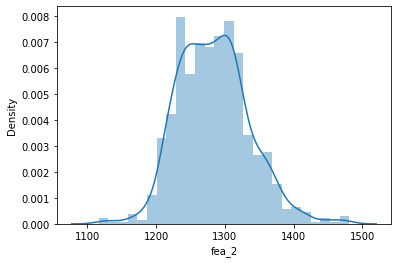

In [6]:
sns.distplot(dataset['fea_2'])

##Impute

In [7]:
dataset['fea_2'] = dataset['fea_2'].fillna(dataset['fea_2'].mean())

In [8]:
dataset.head()

,label,id,fea_1,fea_2,fea_3,fea_4,fea_5,fea_6,fea_7,fea_8,fea_9,fea_10,fea_11
0,1,54982665,5,1245.500000,3,77000.0,2,15,5,109,5,151300,244.948974
1,0,59004779,4,1277.000000,1,113000.0,2,8,-1,100,3,341759,207.173840
2,0,58990862,7,1298.000000,1,110000.0,2,11,-1,101,5,72001,1.000000
3,1,58995168,7,1335.500000,1,151000.0,2,11,5,110,3,60084,1.000000
4,0,54987320,7,1283.911373,2,59000.0,2,11,5,108,4,450081,197.403141


In [9]:
dataset.isnull().sum()

label     0
id        0
fea_1     0
fea_2     0
fea_3     0
fea_4     0
fea_5     0
fea_6     0
fea_7     0
fea_8     0
fea_9     0
fea_10    0
fea_11    0
dtype: int64

##Score


###Split dataset

In [10]:
X = dataset.drop("label", axis=1)
y = dataset["label"]

In [11]:
from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(X, y, train_size=0.2, random_state=0)

###SVC

In [12]:
from sklearn.svm import SVC
svc = SVC(kernel="rbf", random_state=0)

#### Stratified K Fold

In [13]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
skFold = StratifiedKFold(n_splits=10)
skFoldResult = cross_val_score(svc, X, y, cv=skFold)
skFoldScore = np.mean(skFoldResult)

#### Repeated Random Sub-Sampling

In [14]:
from sklearn.model_selection import ShuffleSplit, cross_val_score
sSplit = ShuffleSplit(n_splits=10, test_size=0.2)
sSplitResult = cross_val_score(svc, X, y, cv=sSplit)
sSplitScore = np.mean(sSplitResult)

###Logistic Regressor


In [15]:
from sklearn.linear_model import LogisticRegression

####Randomized Search

In [16]:
from sklearn.model_selection import RandomizedSearchCV
randParameters = {
    'solver': ['liblinear'],
    'C': [0.1, 1, 10, 100],
    'n_jobs': [1,2,3,4,5]
}
randSearchModel = RandomizedSearchCV(LogisticRegression(), randParameters, verbose=3, n_iter=3)
randSearchModel.fit(xTrain, yTrain)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV 1/5] END ..C=10, n_jobs=1, solver=liblinear;, score=0.800 total time=   0.0s
[CV 2/5] END ..C=10, n_jobs=1, solver=liblinear;, score=0.778 total time=   0.0s
[CV 3/5] END ..C=10, n_jobs=1, solver=liblinear;, score=0.778 total time=   0.0s
[CV 4/5] END ..C=10, n_jobs=1, solver=liblinear;, score=0.778 total time=   0.0s
[CV 5/5] END ..C=10, n_jobs=1, solver=liblinear;, score=0.778 total time=   0.0s
[CV 1/5] END ...C=1, n_jobs=1, solver=liblinear;, score=0.800 total time=   0.0s
[CV 2/5] END ...C=1, n_jobs=1, solver=liblinear;, score=0.778 total time=   0.0s
[CV 3/5] END ...C=1, n_jobs=1, solver=liblinear;, score=0.778 total time=   0.0s
[CV 4/5] END ...C=1, n_jobs=1, solver=liblinear;, score=0.778 total time=   0.0s
[CV 5/5] END ...C=1, n_jobs=1, solver=liblinear;, score=0.778 total time=   0.0s
[CV 1/5] END .C=0.1, n_jobs=2, solver=liblinear;, score=0.800 total time=   0.0s
[CV 2/5] END .C=0.1, n_jobs=2, solver=liblinear;,

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_log

RandomizedSearchCV(estimator=LogisticRegression(), n_iter=3,
                   param_distributions={'C': [0.1, 1, 10, 100],
                                        'n_jobs': [1, 2, 3, 4, 5],
                                        'solver': ['liblinear']},
                   verbose=3)

#### Grid Search

In [17]:
from sklearn.model_selection import GridSearchCV
gsParameters = {
    'solver': ['liblinear'],
    'C': [0.1, 1, 10, 100],
    'n_jobs': [1,2,3,4,5]
}
gridModel = GridSearchCV(LogisticRegression(), gsParameters, verbose=3, cv=5)
gridModel.fit(xTrain, yTrain)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END .C=0.1, n_jobs=1, solver=liblinear;, score=0.800 total time=   0.0s
[CV 2/5] END .C=0.1, n_jobs=1, solver=liblinear;, score=0.778 total time=   0.0s
[CV 3/5] END .C=0.1, n_jobs=1, solver=liblinear;, score=0.778 total time=   0.0s
[CV 4/5] END .C=0.1, n_jobs=1, solver=liblinear;, score=0.778 total time=   0.0s
[CV 5/5] END .C=0.1, n_jobs=1, solver=liblinear;, score=0.778 total time=   0.0s
[CV 1/5] END .C=0.1, n_jobs=2, solver=liblinear;, score=0.800 total time=   0.0s
[CV 2/5] END .C=0.1, n_jobs=2, solver=liblinear;, score=0.778 total time=   0.0s
[CV 3/5] END .C=0.1, n_jobs=2, solver=liblinear;, score=0.778 total time=   0.0s
[CV 4/5] END .C=0.1, n_jobs=2, solver=liblinear;, score=0.778 total time=   0.0s
[CV 5/5] END .C=0.1, n_jobs=2, solver=liblinear;, score=0.778 total time=   0.0s
[CV 1/5] END .C=0.1, n_jobs=3, solver=liblinear;, score=0.800 total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_log

[CV 2/5] END .C=0.1, n_jobs=3, solver=liblinear;, score=0.778 total time=   0.0s
[CV 3/5] END .C=0.1, n_jobs=3, solver=liblinear;, score=0.778 total time=   0.0s
[CV 4/5] END .C=0.1, n_jobs=3, solver=liblinear;, score=0.778 total time=   0.0s
[CV 5/5] END .C=0.1, n_jobs=3, solver=liblinear;, score=0.778 total time=   0.0s
[CV 1/5] END .C=0.1, n_jobs=4, solver=liblinear;, score=0.800 total time=   0.0s
[CV 2/5] END .C=0.1, n_jobs=4, solver=liblinear;, score=0.778 total time=   0.0s
[CV 3/5] END .C=0.1, n_jobs=4, solver=liblinear;, score=0.778 total time=   0.0s
[CV 4/5] END .C=0.1, n_jobs=4, solver=liblinear;, score=0.778 total time=   0.0s
[CV 5/5] END .C=0.1, n_jobs=4, solver=liblinear;, score=0.778 total time=   0.0s
[CV 1/5] END .C=0.1, n_jobs=5, solver=liblinear;, score=0.800 total time=   0.0s
[CV 2/5] END .C=0.1, n_jobs=5, solver=liblinear;, score=0.778 total time=   0.0s
[CV 3/5] END .C=0.1, n_jobs=5, solver=liblinear;, score=0.778 total time=   0.0s
[CV 4/5] END .C=0.1, n_jobs=

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs))
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs))
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs))
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  " = {}.".format(effective_n_jobs(self.n_jobs))
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_log

[CV 2/5] END ...C=1, n_jobs=1, solver=liblinear;, score=0.778 total time=   0.0s
[CV 3/5] END ...C=1, n_jobs=1, solver=liblinear;, score=0.778 total time=   0.0s
[CV 4/5] END ...C=1, n_jobs=1, solver=liblinear;, score=0.778 total time=   0.0s
[CV 5/5] END ...C=1, n_jobs=1, solver=liblinear;, score=0.778 total time=   0.0s
[CV 1/5] END ...C=1, n_jobs=2, solver=liblinear;, score=0.800 total time=   0.0s
[CV 2/5] END ...C=1, n_jobs=2, solver=liblinear;, score=0.778 total time=   0.0s
[CV 3/5] END ...C=1, n_jobs=2, solver=liblinear;, score=0.778 total time=   0.0s
[CV 4/5] END ...C=1, n_jobs=2, solver=liblinear;, score=0.778 total time=   0.0s
[CV 5/5] END ...C=1, n_jobs=2, solver=liblinear;, score=0.778 total time=   0.0s
[CV 1/5] END ...C=1, n_jobs=3, solver=liblinear;, score=0.800 total time=   0.0s
[CV 2/5] END ...C=1, n_jobs=3, solver=liblinear;, score=0.778 total time=   0.0s
[CV 3/5] END ...C=1, n_jobs=3, solver=liblinear;, score=0.778 total time=   0.0s
[CV 4/5] END ...C=1, n_jobs=

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 3.
  " = {}.".format(effective_n_jobs(self.n_jobs))
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_log

[CV 2/5] END ...C=1, n_jobs=4, solver=liblinear;, score=0.778 total time=   0.0s
[CV 3/5] END ...C=1, n_jobs=4, solver=liblinear;, score=0.778 total time=   0.0s
[CV 4/5] END ...C=1, n_jobs=4, solver=liblinear;, score=0.778 total time=   0.0s
[CV 5/5] END ...C=1, n_jobs=4, solver=liblinear;, score=0.778 total time=   0.0s
[CV 1/5] END ...C=1, n_jobs=5, solver=liblinear;, score=0.800 total time=   0.0s
[CV 2/5] END ...C=1, n_jobs=5, solver=liblinear;, score=0.778 total time=   0.0s
[CV 3/5] END ...C=1, n_jobs=5, solver=liblinear;, score=0.778 total time=   0.0s
[CV 4/5] END ...C=1, n_jobs=5, solver=liblinear;, score=0.778 total time=   0.0s
[CV 5/5] END ...C=1, n_jobs=5, solver=liblinear;, score=0.778 total time=   0.0s
[CV 1/5] END ..C=10, n_jobs=1, solver=liblinear;, score=0.800 total time=   0.0s
[CV 2/5] END ..C=10, n_jobs=1, solver=liblinear;, score=0.778 total time=   0.0s
[CV 3/5] END ..C=10, n_jobs=1, solver=liblinear;, score=0.778 total time=   0.0s
[CV 4/5] END ..C=10, n_jobs=

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  " = {}.".format(effective_n_jobs(self.n_jobs))
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_log

[CV 4/5] END ..C=10, n_jobs=2, solver=liblinear;, score=0.778 total time=   0.0s
[CV 5/5] END ..C=10, n_jobs=2, solver=liblinear;, score=0.778 total time=   0.0s
[CV 1/5] END ..C=10, n_jobs=3, solver=liblinear;, score=0.800 total time=   0.0s
[CV 2/5] END ..C=10, n_jobs=3, solver=liblinear;, score=0.778 total time=   0.0s
[CV 3/5] END ..C=10, n_jobs=3, solver=liblinear;, score=0.778 total time=   0.0s
[CV 4/5] END ..C=10, n_jobs=3, solver=liblinear;, score=0.778 total time=   0.0s
[CV 5/5] END ..C=10, n_jobs=3, solver=liblinear;, score=0.778 total time=   0.0s
[CV 1/5] END ..C=10, n_jobs=4, solver=liblinear;, score=0.800 total time=   0.0s
[CV 2/5] END ..C=10, n_jobs=4, solver=liblinear;, score=0.778 total time=   0.0s
[CV 3/5] END ..C=10, n_jobs=4, solver=liblinear;, score=0.778 total time=   0.0s
[CV 4/5] END ..C=10, n_jobs=4, solver=liblinear;, score=0.778 total time=   0.0s
[CV 5/5] END ..C=10, n_jobs=4, solver=liblinear;, score=0.778 total time=   0.0s
[CV 1/5] END ..C=10, n_jobs=

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 3.
  " = {}.".format(effective_n_jobs(self.n_jobs))
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 3.
  " = {}.".format(effective_n_jobs(self.n_jobs))
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs))
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs))
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_log

[CV 3/5] END ..C=10, n_jobs=5, solver=liblinear;, score=0.778 total time=   0.0s
[CV 4/5] END ..C=10, n_jobs=5, solver=liblinear;, score=0.778 total time=   0.0s
[CV 5/5] END ..C=10, n_jobs=5, solver=liblinear;, score=0.778 total time=   0.0s
[CV 1/5] END .C=100, n_jobs=1, solver=liblinear;, score=0.800 total time=   0.0s
[CV 2/5] END .C=100, n_jobs=1, solver=liblinear;, score=0.778 total time=   0.0s
[CV 3/5] END .C=100, n_jobs=1, solver=liblinear;, score=0.778 total time=   0.0s
[CV 4/5] END .C=100, n_jobs=1, solver=liblinear;, score=0.778 total time=   0.0s
[CV 5/5] END .C=100, n_jobs=1, solver=liblinear;, score=0.778 total time=   0.0s
[CV 1/5] END .C=100, n_jobs=2, solver=liblinear;, score=0.800 total time=   0.0s
[CV 2/5] END .C=100, n_jobs=2, solver=liblinear;, score=0.778 total time=   0.0s
[CV 3/5] END .C=100, n_jobs=2, solver=liblinear;, score=0.778 total time=   0.0s
[CV 4/5] END .C=100, n_jobs=2, solver=liblinear;, score=0.778 total time=   0.0s
[CV 5/5] END .C=100, n_jobs=

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_log

[CV 2/5] END .C=100, n_jobs=4, solver=liblinear;, score=0.778 total time=   0.0s
[CV 3/5] END .C=100, n_jobs=4, solver=liblinear;, score=0.778 total time=   0.0s
[CV 4/5] END .C=100, n_jobs=4, solver=liblinear;, score=0.778 total time=   0.0s
[CV 5/5] END .C=100, n_jobs=4, solver=liblinear;, score=0.778 total time=   0.0s
[CV 1/5] END .C=100, n_jobs=5, solver=liblinear;, score=0.800 total time=   0.0s
[CV 2/5] END .C=100, n_jobs=5, solver=liblinear;, score=0.778 total time=   0.0s
[CV 3/5] END .C=100, n_jobs=5, solver=liblinear;, score=0.778 total time=   0.0s
[CV 4/5] END .C=100, n_jobs=5, solver=liblinear;, score=0.778 total time=   0.0s
[CV 5/5] END .C=100, n_jobs=5, solver=liblinear;, score=0.778 total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  " = {}.".format(effective_n_jobs(self.n_jobs))
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  " = {}.".format(effective_n_jobs(self.n_jobs))
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  " = {}.".format(effective_n_jobs(self.n_jobs))


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.1, 1, 10, 100], 'n_jobs': [1, 2, 3, 4, 5],
                         'solver': ['liblinear']},
             verbose=3)

# Scores

In [18]:
from prettytable import PrettyTable
ptable = PrettyTable(["Method", "Score"])
ptable.add_rows([
    ["Stratified K Fold", skFoldScore],
    ["Repeated Random Sub-Sampling", sSplitScore],
    ["Randomized Search", randSearchModel.best_score_],
    ["Grid Search", gridModel.best_score_],
])
print(ptable)

+------------------------------+--------------------+
|            Method            |       Score        |
+------------------------------+--------------------+
|      Stratified K Fold       | 0.8000158027812896 |
| Repeated Random Sub-Sampling | 0.7973333333333332 |
|      Randomized Search       | 0.7822222222222222 |
|         Grid Search          | 0.7822222222222222 |
+------------------------------+--------------------+


The Stratified K Fold is the best model for this data.